# Iris 데이터셋을 활용한 PCA

## 데이터셋

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['species'] = iris.target
iris_pd.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


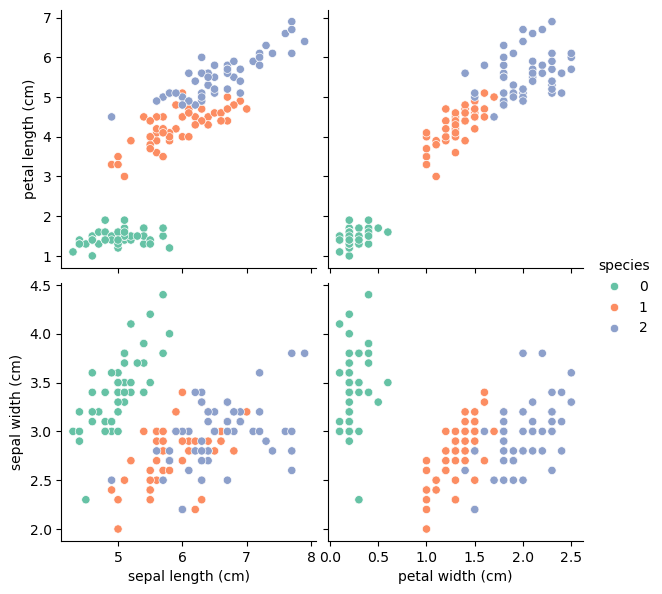

In [2]:
import seaborn as sns

sns.pairplot(iris_pd, hue='species', height=3,
             x_vars=['sepal length (cm)', 'petal width (cm)'],
             y_vars=['petal length (cm)', 'sepal width (cm)'],
             palette='Set2')

## StandardScaler

In [3]:
from sklearn.preprocessing import StandardScaler

iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

## PCA fit

In [4]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=2) :
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [5]:
iris_pca, pca = get_pca_data(iris_ss)

iris_ss.shape, iris_pca.shape

((150, 4), (150, 2))

In [6]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [7]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

## PCA 결과 pandas 정리

In [8]:
def get_pd_from_pca(pca_data, cols=['pca_component_1', 'pca_component_2']) :
    return pd.DataFrame(pca_data, columns=cols)

In [17]:
iris_pd_pca = get_pd_from_pca(iris_pca, cols=['PC1', 'PC2'])
iris_pd_pca['species'] = iris.target
iris_pd_pca.head()

,PC1,PC2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


## 2차원으로 축소된 두 개의 특성 시각화

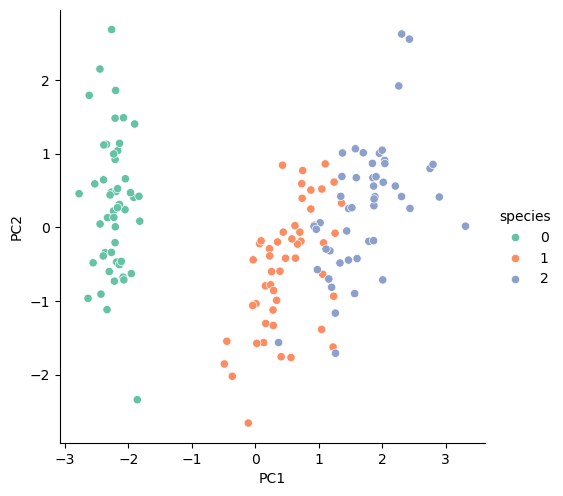

In [18]:
sns.pairplot(iris_pd_pca, hue='species', height=5,
             x_vars=['PC1'], y_vars=['PC2'],
             palette='Set2')

## 설명력 확인

In [19]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [20]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

## 주성분을 활용한 iris 품종 분류

### scaling된 데이터로 먼저 확인

In [21]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def rf_scores(x, y, cv=5) :
    rf = RandomForestClassifier(random_state=13, n_estimators=100)
    scores_rf = cross_val_score(rf, x, y, scoring='accuracy', cv=cv)

    print('Score : ', np.mean(scores_rf))

rf_scores(iris_ss, iris.target)

Score :  0.96


### 2차원으로 축소된 feature로 품종 분류 및 검증 점수 확인

In [22]:
pca_x = iris_pd_pca[['PC1', 'PC2']]

rf_scores(pca_x, iris.target)

Score :  0.9066666666666666
